In [6]:
# Course : CS 513 - Knowledge Discovery and Data Mining
# Group Members: Branden Bulatao, Joseph Faustino, Natalie Fortes, Isabel Sutedjo
# Id : 20005971, 20006114, 20006007, 20006618
# Purpose : Music Happiness Predictor - Predicts the happiness of music tracks based on various features.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import dataset
df = pd.read_csv('./dataset.csv')

df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True) # drop unnamed column
df.dropna(inplace=True) # drop rows with null values

df['valence'] = df['valence'].astype('category')
df['valence'] = df['valence'].map(lambda x: 0 if x < 0.5 else 1) # sets valence to 0 if sad, 1 if happy

# Convert 'explicit' boolean to integer (0/1)
df['explicit'] = df['explicit'].astype(int)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['key', 'time_signature', 'track_genre'], drop_first=True)

scaler = StandardScaler()
X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'valence'], axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df['valence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,1.782624,0.024557,-0.305769,0.629239,-0.717147,0.300825,-1.326297,0.551843,-0.850193,-0.504111,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
1,0.975625,-0.730889,-0.305769,-0.845908,-1.889974,-1.784739,0.753979,-0.078995,1.831744,-0.504097,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
2,1.065291,-0.160353,-0.305769,-0.742187,-1.122667,-0.293289,0.753979,-0.273827,-0.315489,-0.504115,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
3,1.692957,-0.243236,-0.305769,-1.733301,-2.312987,-2.039246,0.753979,-0.457309,1.774605,-0.503886,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
4,2.186123,-0.271942,-0.305769,0.295026,-0.788709,-0.282751,0.753979,-0.303146,0.463409,-0.504115,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,-0.548707,1.462948,-0.305769,-2.274956,-1.615652,-1.617321,0.753979,-0.401507,0.977663,2.493742,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630099
113995,-0.503873,1.462957,-0.305769,-2.263432,-2.084782,-2.000075,-1.326297,-0.421369,2.042258,2.648803,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630099
113996,-0.503873,0.404815,-0.305769,0.358411,-1.241937,-0.524135,-1.326297,-0.403399,1.660327,-0.504115,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630099
113997,0.347959,0.520635,-0.305769,0.116395,-0.538241,-0.522942,0.753979,-0.519731,0.198764,-0.504115,...,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,-0.094073,10.630099


In [2]:
from sklearn.linear_model import SGDClassifier

svm_linear = SGDClassifier(loss='hinge', max_iter=1000, class_weight='balanced', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 76.11%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77     18571
           1       0.72      0.77      0.75     15629

    accuracy                           0.76     34200
   macro avg       0.76      0.76      0.76     34200
weighted avg       0.76      0.76      0.76     34200



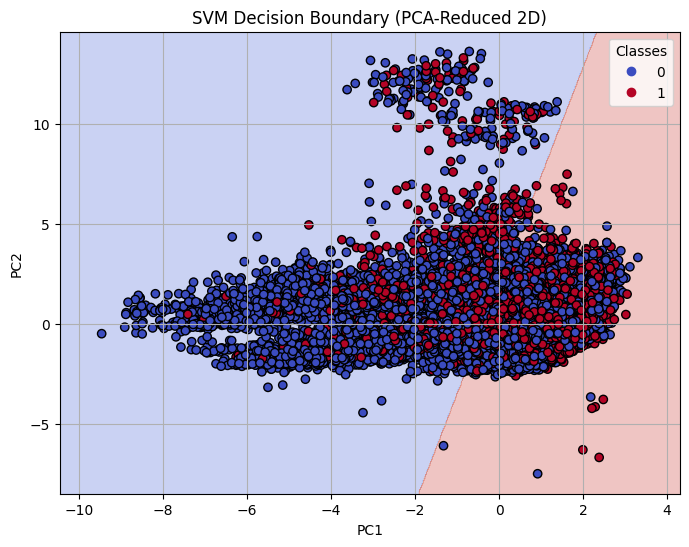

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features before PCA and model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce to 2D with PCA for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_scaled)
X_test_2D = pca.transform(X_test_scaled)

# Retrain model on reduced features
svm_2D = SGDClassifier(loss='hinge', max_iter=1000, class_weight='balanced', random_state=42)
svm_2D.fit(X_train_2D, y_train)

# Plotting
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title("SVM Decision Boundary (PCA-Reduced 2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Plot
plot_decision_boundary(svm_2D, X_test_2D, y_test)


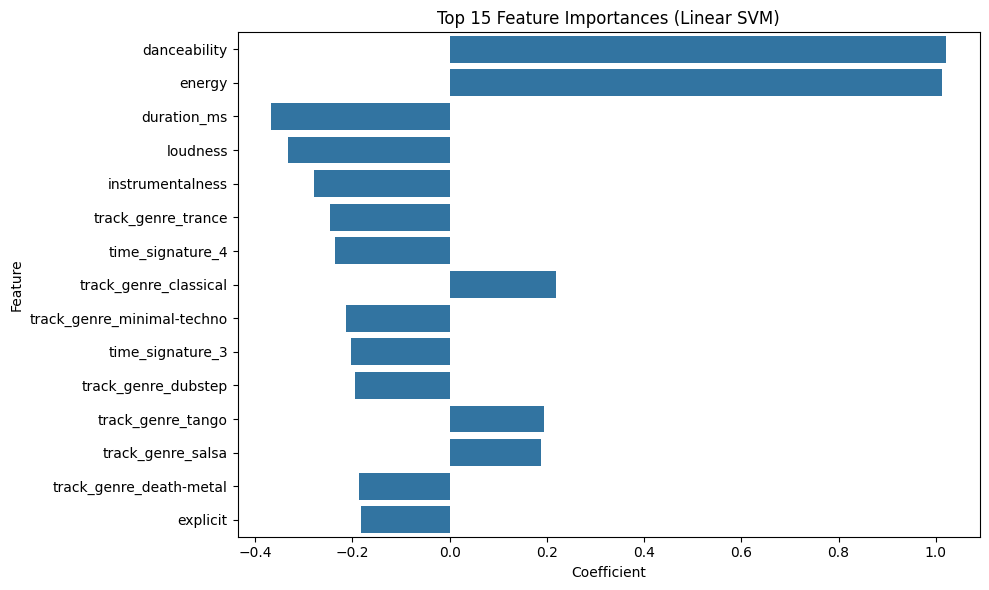

In [4]:
import numpy as np
import seaborn as sns

feature_names = X_train.columns  # or manually define if using a NumPy array
coefs = svm_linear.coef_[0]  # for binary classification

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15))
plt.title("Top 15 Feature Importances (Linear SVM)")
plt.tight_layout()
plt.show()


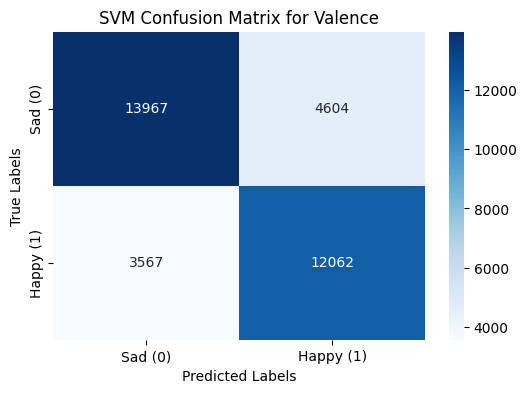

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(6, 4))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", ax=ax)

# Labels, title, and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("SVM Confusion Matrix for Valence")
ax.xaxis.set_ticklabels(["Sad (0)", "Happy (1)"])
ax.yaxis.set_ticklabels(["Sad (0)", "Happy (1)"])

plt.show()